In [2]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

In [18]:
world = imps.AcousticWorld()

l0 = 100.0

rad0 = .0075

ducts = []
loss=True

duct = imps.Duct(world=world,losses=loss)
duct.set_termination(imps.PerfectOpenEnd())
duct.append_element(imps.StraightDuct(length=l0,radius=rad0))
ducts.append(duct)

duct = imps.Duct(world=world,losses=loss)
duct.set_termination(imps.PerfectClosedEnd())
duct.append_element(imps.StraightDuct(length=l0,radius=rad0))
ducts.append(duct)

duct = imps.Duct(world=world,losses=loss)
duct.set_termination(imps.PerfectAnechoicEnd())
duct.append_element(imps.StraightDuct(length=l0,radius=rad0))
ducts.append(duct)


<IPython.core.display.Javascript object>


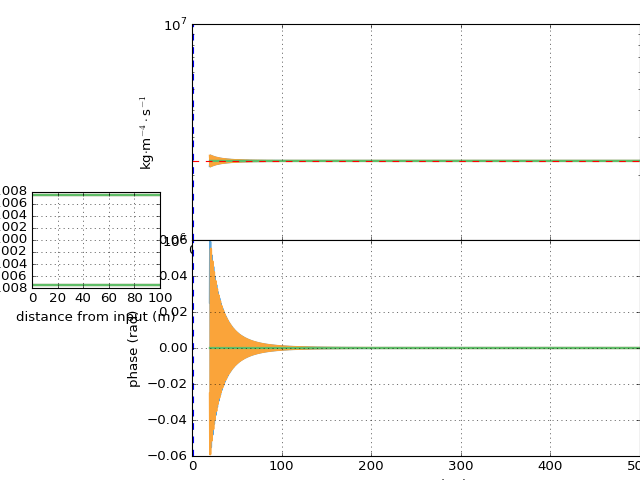

In [19]:
fvec = np.linspace(10,500,1000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    if ax is None:
        ax=duct.plot_report( fmin=20, fmax=max(fvec), npoints=10000)
    else:
        duct.plot_report(ax=ax, fmin=20, fmax=max(fvec), npoints=10000)
    
ax[1].axhline((np.abs(duct.elements[0].get_characteristic_impedance())),
              lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
f+=c/(4*l0)
ax[1].axvline(f,ls='--',lw=1)
ax[2].axvline(f,ls='--',lw=1)